In [130]:
import pandas as pd
import datetime as dt
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from  scipy.stats import skew, kurtosis, shapiro

In [131]:
path = "../../Data/CSV_Files/Gas_Demand_Tot.csv"
data = pd.read_csv(path, sep=",")
# data = data[data["name"]=="Demanda programada PBF total"]
data["Date"] =  pd.to_datetime(data["Date"])
# data["Date"] = data["Date"].dt.date
data.set_index("Date",inplace=True)
data = data[["Consumption(Bscf)"]]
# data = data.asfreq("D")
data = data.rename(columns={"Consumption(Bscf)":"energy"})
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 220 entries, 2019-04-01 to 2001-01-01
Data columns (total 1 columns):
energy    220 non-null float64
dtypes: float64(1)
memory usage: 3.4 KB


,energy
Date,
2019-04-01,2182.901
2019-03-01,2882.561
2019-02-01,2983.892
2019-01-01,3379.295
2018-12-01,2958.554


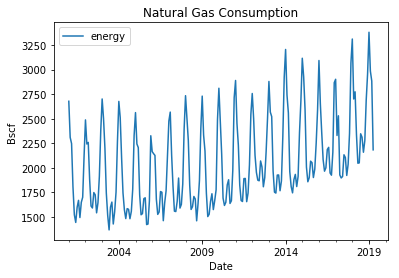

In [132]:
data.plot(title="Natural Gas Consumption")
plt.ylabel("Bscf")
plt.show()

In [12]:
# pd.date_range(start="2014-01-01",end="2018-12-31")

In [133]:
data["year"] = data.index.year
data["qtr"] = data.index.quarter
data["month"] = data.index.month
# data["week"] = data.index.week
# data["day"] = data.index.weekday
data["ix"] = range(0,len(data))
data["log(energy)"]=np.log(data["energy"])
# data[["movave_7","movstd_7"]] = data["energy"].rolling(7).agg([np.mean, np.std])
# data[["movave_30","movstd_30"]] = data["energy"].rolling(30).agg([np.mean, np.std])
# data[["movave_90","movstd_90"]] = data["energy"].rolling(90).agg([np.mean, np.std])
# data[["movave_365","movstd_365"]] = data["energy"].rolling(365).agg([np.mean, np.std])
data.head()

,energy,year,qtr,month,ix,log(energy)
Date,,,,,,
2019-04-01,2182.901,2019,2,4,0,7.688410
2019-03-01,2882.561,2019,1,3,1,7.966434
2019-02-01,2983.892,2019,1,2,2,8.000984
2019-01-01,3379.295,2019,1,1,3,8.125422
2018-12-01,2958.554,2018,4,12,4,7.992456


In [28]:
# plt.figure(figsize=(20,16))
# data[["energy","movave_7"]].plot(title="Daily Energy Demand in Spain (MWh)")
# plt.ylabel("(MWh)")
# plt.show()

# Target Analyisis: Normality

In [134]:
mean_of_log = data["log(energy)"].mean()
std_of_log = data["log(energy)"].std()
skew_of_log = data["log(energy)"].skew()
ex_kurt_of_log = data["log(energy)"].kurtosis()

mean = data["energy"].mean()
std = data["energy"].std()
skew = data["energy"].skew()
ex_kurt = data["energy"].kurtosis()

print(f"Mean: {mean} \n Std: {std} \n Skew: {skew} \n Kurtosis: {ex_kurt+3}")
print(f"Mean of log of data: {mean_of_log} \n Std of log of data: {std_of_log} \n Skew of log of data: {skew_of_log} \n Kurtosis of log of data: {ex_kurt_of_log+3}")

Mean: 2059.0168818181814 
 Std: 442.99393249611154 
 Skew: 0.7118853715415384 
 Kurtosis: 2.7540662805723426
Mean of log of data: 7.6080922620166325 
 Std of log of data: 0.20749650438094175 
 Skew of log of data: 0.3589356780166122 
 Kurtosis of log of data: 2.2216998889171578


In [53]:
def shapiro_test(data, alpha=0.05):
    stat, pval = shapiro(data)
    print("H0: Data was drawn from a Normal Ditribution")
    if (pval<alpha):
        print("pval {} is lower than significance level: {}, therefore null hypothesis is rejected".format(pval, alpha))
    else:
        print("pval {} is higher than significance level: {}, therefore null hypothesis cannot be rejected".format(pval, alpha))
        
shapiro_test(data["log(energy)"], alpha=0.05)


H0: Data was drawn from a Normal Ditribution
pval 9.433412924408913e-05 is lower than significance level: 0.05, therefore null hypothesis is rejected


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


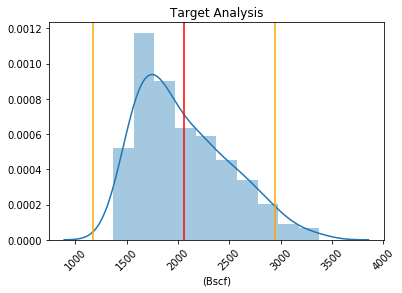

In [58]:
# histogram of unaltered data
sns.distplot(data["energy"])
plt.title("Target Analysis")
plt.xticks(rotation=45)
plt.xlabel("(Bscf)")
plt.axvline(x=mean, color='r', linestyle='-', label="\mu: {0:.2f}%".format(mean))
plt.axvline(x=mean+2*std, color='orange', linestyle='-')
plt.axvline(x=mean-2*std, color='orange', linestyle='-')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


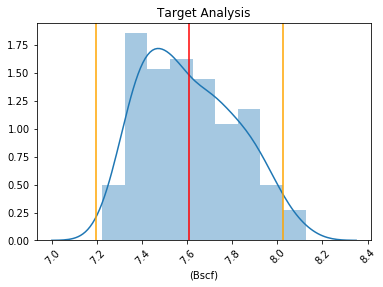

In [57]:
# histogram of log of data
sns.distplot(data["log(energy)"])
plt.title("Target Analysis")
plt.xticks(rotation=45)
plt.xlabel("(Bscf)")
plt.axvline(x=mean_of_log, color='r', linestyle='-', label="\mu: {0:.2f}%".format(mean_of_log))
plt.axvline(x=mean_of_log+2*std_of_log, color='orange', linestyle='-')
plt.axvline(x=mean_of_log-2*std_of_log, color='orange', linestyle='-')
plt.show()

Broadly speaking, data does not look like a normal distribution, because it has a small left tail and the chance of observing extreme values is smaller, comparing to normally distributed data

In [61]:
# # Insert the rolling quantiles to the monthly returns
# data_rolling = data["energy"].rolling(window=90)
# data['q10'] = data_rolling.quantile(0.1).to_frame("q10")
# data['q50'] = data_rolling.quantile(0.5).to_frame("q50")
# data['q90'] = data_rolling.quantile(0.9).to_frame("q90")

# data[["q10", "q50", "q90"]].plot(title="Volatility Analysis: 90-rolling percentiles")
# plt.ylabel("(MWh)")
# plt.show()

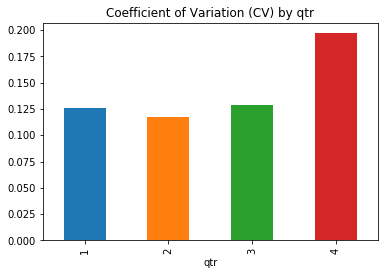

In [60]:
data.groupby("qtr")["energy"].std().divide(data.groupby("qtr")["energy"].mean()).plot(kind="bar")
plt.title("Coefficient of Variation (CV) by qtr")
plt.show()

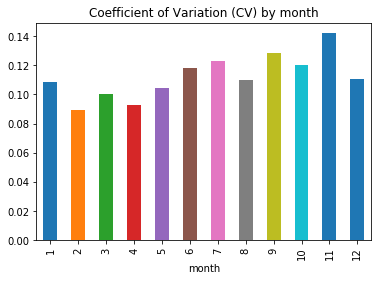

In [64]:
data.groupby("month")["energy"].std().divide(data.groupby("month")["energy"].mean()).plot(kind="bar")
plt.title("Coefficient of Variation (CV) by month")
plt.show()

In [65]:
# data[["movstd_30", "movstd_365"]].plot(title="Heteroscedasticity analysis")
# plt.ylabel("(MWh)")
# plt.show()

# Time Series Analysis: Seasonality and Trend

In [66]:
# data[["movave_30", "movave_90"]].plot(title="Seasonal Analysis: Moving Averages")
# plt.ylabel("(MWh)")
# plt.show()

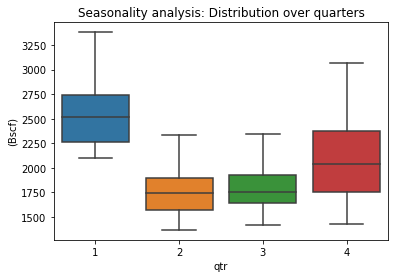

In [68]:
sns.boxplot(data=data, x="qtr", y="energy")
plt.title("Seasonality analysis: Distribution over quarters")
plt.ylabel("(Bscf)")
plt.show()

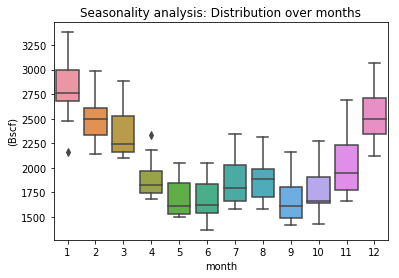

In [71]:
sns.boxplot(data=data, x="month", y="energy")
plt.title("Seasonality analysis: Distribution over months")
plt.ylabel("(Bscf)")
plt.show()

In [75]:
# data_mon = data["energy"].resample("M").agg(sum).to_frame("energy")
# data_mon["ix"] = range(0, len(data_mon))
# data_mon.head()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


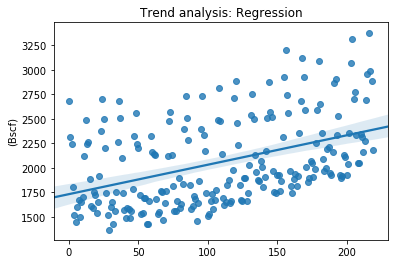

In [74]:
sns.regplot(data=data_mon,x="ix", y="energy")
plt.title("Trend analysis: Regression")
plt.ylabel("(Bscf)")
plt.xlabel("")
plt.show()

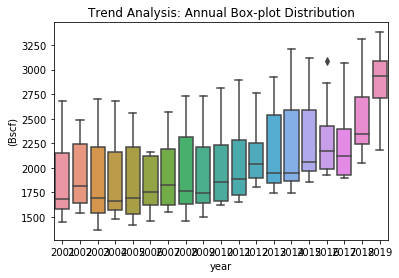

In [78]:
sns.boxplot(data=data, x="year", y="energy")
plt.title("Trend Analysis: Annual Box-plot Distribution")
plt.ylabel("(Bscf)")
plt.show()

There is a positive linear (or sligthly damped) trend in energy demand, beacause of a steady economic grownth due to recession recovery.

# Feature Engineering

The challenge now is to create some features in a very automated way that can deal with seasonality, trend and changes in volatility. The most basic strategy is to use lagged features and rolling window stats, but consider other advanced techniques for further research:

- Momentum and Mean reversion, like RSI in financial markets (https://en.wikipedia.org/wiki/Relative_strength_index)

- Sequence minning

Data is standardized in order to allow application of models that are sensitive to scale, like neural networks or svm. Remember that distribution shape is maintained, it only changes first and second momentum (mean and standard deviation)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


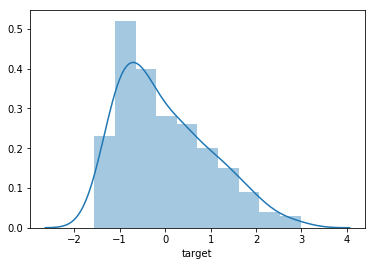

In [137]:
data["target"] = data["energy"].add(-mean).div(std)
sns.distplot(data["target"])
plt.show()

In [138]:
shapiro_test(data.target, alpha=0.05)

H0: Data was drawn from a Normal Ditribution
pval 1.2111112823731673e-07 is lower than significance level: 0.05, therefore null hypothesis is rejected


In [154]:
features = []
corr_features=[]
targets = []
tau = 12 #forecasting periods

for t in range(0, tau+1):
    data["target_t" + str(t)] = data["target"].shift(t)
    targets.append("target_t" + str(t))
    
for t in range(1, tau+1):
    data["feat_ar" + str(t)] = data["target"].shift(-t)   
    features.append("feat_ar" + str(t))
    
# for t in [7, 14, 30]:
#     data[["feat_movave" + str(t), "feat_movstd" + str(t), "feat_movmin" + str(t) ,"feat_movmax" + str(t)]] = data["energy"].rolling(t).agg([np.mean, np.std, np.max, np.min])
#     features.append("feat_movave" + str(t))
#     #corr_features.append("feat_movave" + str(t))
#     features.append("feat_movstd" + str(t))
#     features.append("feat_movmin" + str(t))
#     features.append("feat_movmax" + str(t))

In [155]:
months = pd.get_dummies(data["month"],
                              prefix="month",
                              drop_first=False)

months.index = data.index
data = pd.concat([data, months], axis=1)

# days = pd.get_dummies(data.day,
#                               prefix="day",
#                               drop_first=True)
# days.index = data.index
# data = pd.concat([data, days], axis=1)
# print(months)
print(months.columns.values.tolist())

['month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']


In [156]:
features_months = features + months.columns.values.tolist()
features

['feat_ar1',
 'feat_ar2',
 'feat_ar3',
 'feat_ar4',
 'feat_ar5',
 'feat_ar6',
 'feat_ar7',
 'feat_ar8',
 'feat_ar9',
 'feat_ar10',
 'feat_ar11',
 'feat_ar12']

In [157]:
corr = data[targets].corr()
print(corr)

            target_t0  target_t1  target_t2  target_t3  target_t4  target_t5  \
target_t0    1.000000   0.783496   0.413408   0.054986  -0.144500  -0.190452   
target_t1    0.783496   1.000000   0.783922   0.412665   0.059016  -0.137399   
target_t2    0.413408   0.783922   1.000000   0.783709   0.414809   0.062642   
target_t3    0.054986   0.412665   0.783709   1.000000   0.785741   0.418904   
target_t4   -0.144500   0.059016   0.414809   0.785741   1.000000   0.785842   
target_t5   -0.190452  -0.137399   0.062642   0.418904   0.785842   1.000000   
target_t6   -0.199056  -0.182522  -0.134060   0.065943   0.417513   0.784233   
target_t7   -0.201180  -0.193160  -0.179998  -0.132099   0.063473   0.414088   
target_t8   -0.176156  -0.196252  -0.190966  -0.178346  -0.134719   0.058750   
target_t9    0.013722  -0.168493  -0.193208  -0.188730  -0.182469  -0.143159   
target_t10   0.383950   0.020700  -0.166064  -0.191442  -0.191662  -0.188975   
target_t11   0.764886   0.392800   0.023

In [159]:
# data

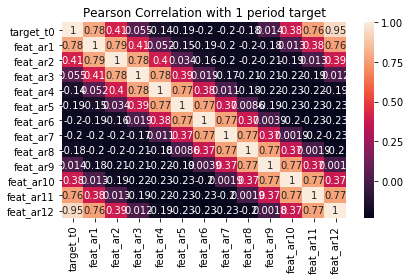

In [166]:
# Calculate correlation matrix
corr = data[["target_t0"] + features].corr()


# Plot heatmap of correlation matrix
sns.heatmap(corr, annot=True)
plt.title("Pearson Correlation with 1 period target")
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


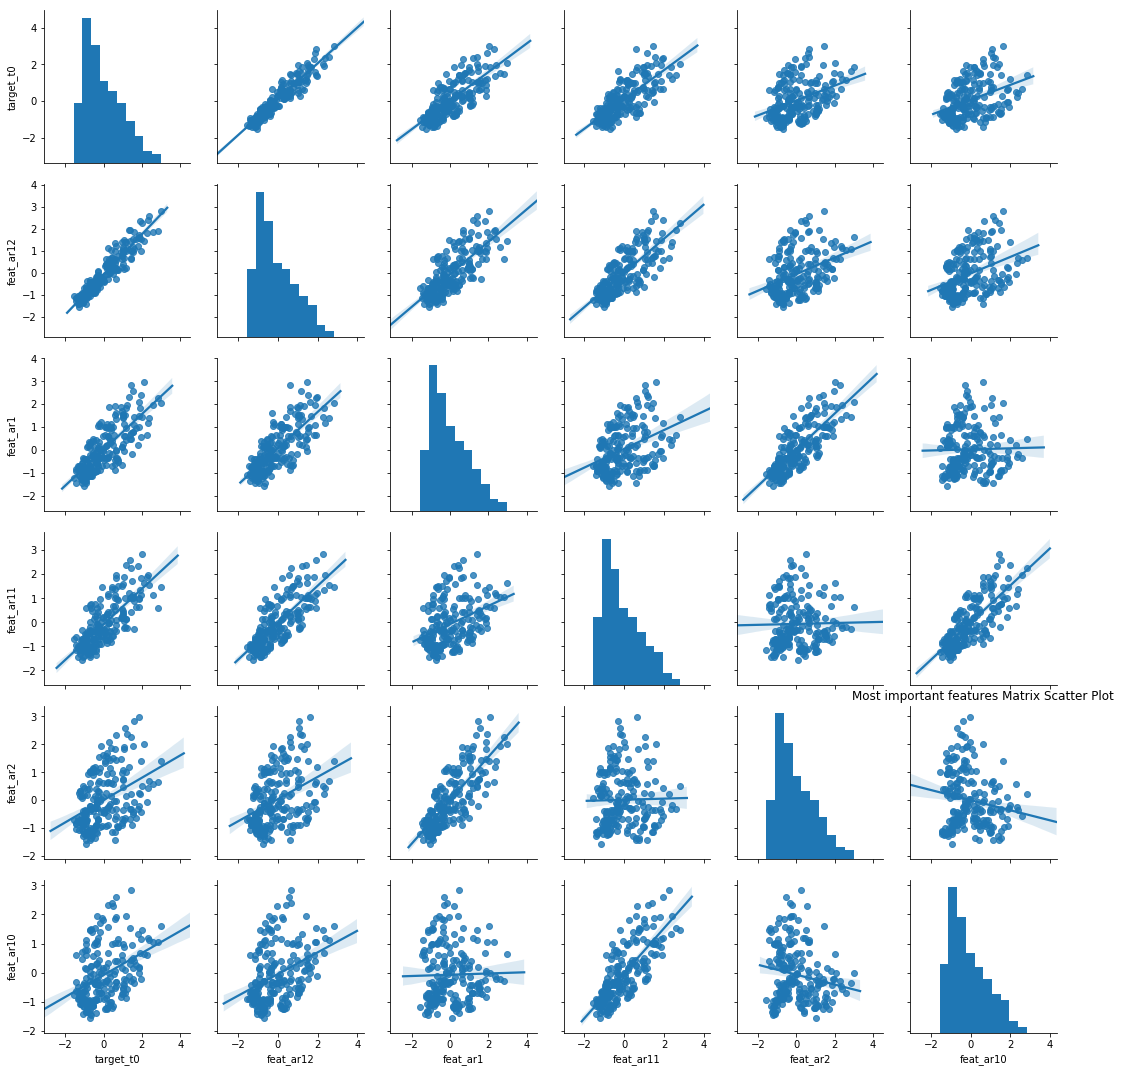

In [168]:
top5_mostCorrFeats = corr["target_t0"].apply(abs).sort_values(ascending=False).index.values[:6]
sns.pairplot(data=data[top5_mostCorrFeats].dropna(), kind="reg")
plt.title("Most important features Matrix Scatter Plot")
plt.show()

There are some features that are quite strongly linearly correlated with target, like AR_6 and MOVAVE_7, let's build some models and check this assumption

# Model Building

In this step, two candidates models are build using an nice feature in Scikit-Learn such us MultiOutput Regression, it provides a framework to automatically and easily fit models to predict several target variables. (https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputRegressor.html)

First a baseline model (linear regression) will be fit and compared to a more advanced model, like Random Forest. A linear model does not need hyperparamenter tunning, and there is some correlation in data, so it is a strongh foundation, but there are several caveats:

- Target variable is not perfectly normally distributed with constant variance

- There are a lot of multicollinearity among predictors

- Observations are not independent

On the other hand an advanced model, like Random Forest, needs to perform hyperparamenter tunning, tipically it is solved by using GridSearch and Cross Validation, but time series data is not suitable to be used in CV, because data is shuffled in order to build k-folds. On the other hand, Scikit-Learng provide us with a nice solution: TimeSeries Splits, that respect time structure of date and iterativelly allow us to perform GridSearch

In [162]:
data_feateng = data[["year"] + features + targets].dropna()
nobs= len(data_feateng)
print("Number of observations: ", nobs)

Number of observations:  196


Split Data

Data points in 2018 are used as a holdout data to perform a honest assessment of model performance and carry out some residual analysis (6 months)

Total number of observations:  196
Train: (168, 12)(168, 13), 
Test: (28, 12)(28, 13)


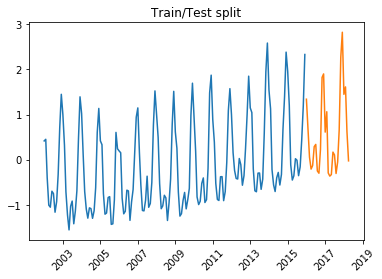

In [172]:
train_test_split = 2016
X_train = data_feateng[features].loc[data_feateng["year"]<train_test_split]
y_train = data_feateng[targets].loc[data_feateng["year"]<train_test_split]

X_test = data_feateng[features].loc[data_feateng["year"]>=train_test_split]
y_test = data_feateng[targets].loc[data_feateng["year"]>=train_test_split]


n, k = X_train.shape
print("Total number of observations: ", nobs)
print("Train: {}{}, \nTest: {}{}".format(X_train.shape, y_train.shape,
                                              X_test.shape, y_test.shape))

# plt.plot(y_train.index, y_train["target_t1.values"], label="train")
# plt.plot(y_test.index, y_test["target_t1.values"], label="test")

plt.plot(y_train.index, y_train["target_t1"], label="train")
plt.plot(y_test.index, y_test["target_t1"], label="test")

plt.title("Train/Test split")
plt.xticks(rotation=45)
plt.show()

Baseline Model: Linear Regression

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression().fit(X_train, y_train["target_t0"])
p_train = reg.predict(X_train)
p_test = reg.predict(X_test)

RMSE_train = np.sqrt(mean_squared_error(y_train["target_t0"], p_train))
RMSE_test = np.sqrt(mean_squared_error(y_test["target_t0"], p_test))
R2_train = r2_score(y_train["target_t0"], p_train)
R2_test = r2_score(y_test["target_t0"], p_test)

print("Train RMSE: {}\nTest RMSE: {}".format(RMSE_train, RMSE_test) )
print("Train R2: {}\nTest R2: {}".format(R2_train, R2_test) )

Train RMSE: 0.24596692711839846
Test RMSE: 0.41721308798266526
Train R2: 0.9296230363081865
Test R2: 0.7969032891399224


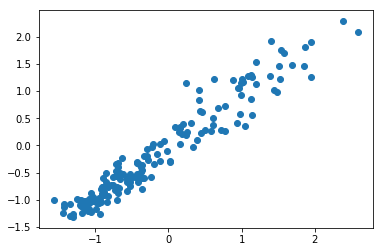

In [174]:
plt.scatter(y_train["target_t0"], p_train, label="train")

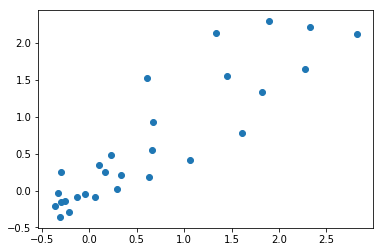

In [176]:
plt.scatter(y_test["target_t0"], p_test, label="test")

Train a Random Forest with Time Series Split to tune Hyperparameters

In this example, TimeSeriesSplit framework is shown, on each fold, train data is closer to the beginning of forecasting period

TRAIN: 42 TEST: 42


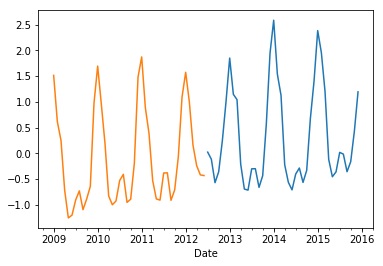

TRAIN: 84 TEST: 42


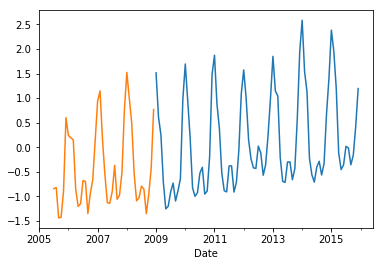

TRAIN: 126 TEST: 42


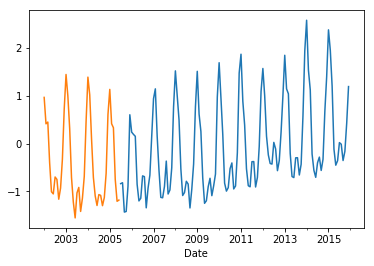

In [177]:
from sklearn.model_selection import TimeSeriesSplit, ParameterGrid

splits = TimeSeriesSplit(n_splits=3, max_train_size=365*2)
for train_index, val_index in splits.split(X_train):
    print("TRAIN:", len(train_index), "TEST:", len(val_index))
    y_train["target_t0"][train_index].plot()
    y_train["target_t0"][val_index].plot()
    plt.show()

In [192]:
# from sklearn.ensemble import RandomForestRegressor

# def TimeSplit_ModBuild(model, paramGrid, splits, X, y):
#     from sklearn.model_selection import TimeSeriesSplit
#     from sklearn.metrics import mean_squared_error

#     #Loop over each time split and for each
#     for train_index, val_index in splits.split(X_train):
#         _X_train_ = X.iloc[train_index]
#         _y_train_ = y.iloc[train_index]
#         _X_val_ = X.iloc[val_index]
#         _y_val_ = y.iloc[val_index]

#         train_scores = []
#         val_scores = []
#         #models = []
        
#         # Loop through the parameter grid, set the hyperparameters, and save the scores
#         for g in paramGrid:
#             model.set_params(**g)
#             model.fit(_X_train_, _y_train_)
#             p_train = model.predict(_X_train_)
#             p_val = model.predict(_X_val_)
#             score_train = np.mean(mean_squared_error(_y_train_, p_train))
#             score_val = np.mean(mean_squared_error(_y_val_, p_val))
#             train_scores.append(score_train)
#             val_scores.append(score_val)
#             #models.append(model)
#             best_idx = np.argmin(val_scores)
            
#         print("Best-Fold HyperParams:: ", paramGrid[best_idx])
#         print("Best-Fold Train RMSE: ", train_scores[best_idx])
#         print("Best-Fold Val RMSE: ",val_scores[best_idx])
#         print("\n")
        
#     #Return most recent model
#     return train_scores, val_scores, best_idx

# splits = TimeSeriesSplit(n_splits=3, max_train_size=12*2)
# rfr = RandomForestRegressor()
# # Create a dictionary of hyperparameters to search
# rfr_grid = {"n_estimators": [500], 
#         'max_depth': [3, 5, 10, 20, 30], 
#         'max_features': ['auto'], 
#         'random_state': [123]}
# rfr_paramGrid = ParameterGrid(rfr_grid)

# CV_rfr_tup = TimeSplit_ModBuild(rfr, rfr_paramGrid, splits, X_train, y_train["target_t0"])

In [238]:
from sklearn.ensemble import RandomForestRegressor
import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [239]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train["target_t0"])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.9s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.9s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=   6.8s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=   6.9s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.2s


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   3.2s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   2.8s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   5.8s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   5.8s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=

[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total=   2.5s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   3.8s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   3.7s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   3.7s
[CV] n_estimators

[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total=   1.6s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.4s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   3.2s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   3.2s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=800, 

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   2.0s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   2.0s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   1.9s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False, total=   0.7s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   2.2s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   2.1s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total=   4.6s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total=   4.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimat

[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total=   2.1s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   2.7s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   2.6s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   2.8s
[CV] n_

[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total=   1.1s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.7s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.7s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.7s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=

[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   1.1s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   1.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   1.2s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   0.8s
[CV] n_estimators=1600, mi

[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=   0.4s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=   2.4s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=   2.5s
[CV] n_estimators=2000

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.2min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
           max_depth=[[[[[100]]]]], max_features=[[[[[[[['auto']]]]]]]],
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=800, n_jobs=1, oob_score=False, random_state=123,
           verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [241]:
rfr_grid = rf_random.best_params_
rfr_grid

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [247]:
from sklearn.ensemble import RandomForestRegressor

def TimeSplit_ModBuild(model, paramGrid, splits, X, y):
    from sklearn.model_selection import TimeSeriesSplit
    from sklearn.metrics import mean_squared_error

    #Loop over each time split and for each
    for train_index, val_index in splits.split(X_train):
        _X_train_ = X.iloc[train_index]
        _y_train_ = y.iloc[train_index]
        _X_val_ = X.iloc[val_index]
        _y_val_ = y.iloc[val_index]

        train_scores = []
        val_scores = []
        #models = []
        
        # Loop through the parameter grid, set the hyperparameters, and save the scores
        for g in paramGrid:
            model.set_params(**g)
            model.fit(_X_train_, _y_train_)
            p_train = model.predict(_X_train_)
            p_val = model.predict(_X_val_)
            score_train = np.mean(mean_squared_error(_y_train_, p_train))
            score_val = np.mean(mean_squared_error(_y_val_, p_val))
            train_scores.append(score_train)
            val_scores.append(score_val)
            #models.append(model)
            best_idx = np.argmin(val_scores)
            
        print("Best-Fold HyperParams:: ", paramGrid[best_idx])
        print("Best-Fold Train RMSE: ", train_scores[best_idx])
        print("Best-Fold Val RMSE: ",val_scores[best_idx])
        print("\n")
        
    #Return most recent model
    return train_scores, val_scores, best_idx

splits = TimeSeriesSplit(n_splits=3, max_train_size=12*2)
rfr = RandomForestRegressor()
# Create a dictionary of hyperparameters to search
rfr_grid = {"n_estimators": [800], 
        'max_depth': [rfr_grid["max_depth"]], 
        'max_features': [rfr_grid['max_features']], 
        'random_state': [123]}
rfr_paramGrid = ParameterGrid(rfr_grid)

CV_rfr_tup = TimeSplit_ModBuild(rfr, rfr_paramGrid, splits, X_train, y_train["target_t0"])

TypeError: '>' not supported between instances of 'list' and 'float'

In [213]:
# CV_rfr_tup[2]

In [216]:
# rfr_paramGrid[CV_rfr_tup[2]]

In [243]:
best_rfr_idx = CV_rfr_tup[2]
best_rfr_grid = rfr_paramGrid[best_rfr_idx]
best_rfr = RandomForestRegressor().set_params(**best_rfr_grid).\
    fit(X_train, y_train["target_t1"])

Using Random Forest provides an important improvement compared to Linear Regression. A word of caution, as RF are built bootstrapping data, so some time structure may be lost.

https://en.wikipedia.org/wiki/Bootstrap_aggregating

Feature importance

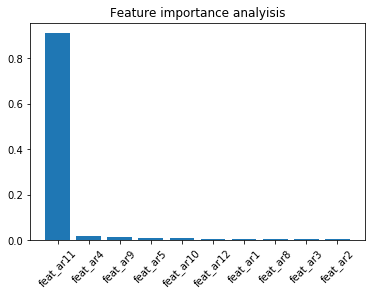

In [244]:
# Get feature importances from our random forest model
importances = best_rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
sorted_index_top = sorted_index[:10]
x = range(len(sorted_index_top))

# Create tick labels 
labels = np.array(features)[sorted_index_top]
plt.bar(x, importances[sorted_index_top], tick_label=labels)
plt.title("Feature importance analyisis")
# Rotate tick labels to vertical
plt.xticks(rotation=45)
plt.show()


Results are not de same as the ones yielded by correlation analysis, showing that complex relationships and interactions may impact model performance. This is a very important point to take into consideration when working with models like ARIMA:

# Model Assessment:

Performance Metrics: MAPE (Mean Absolute Percent Error)

Even though RMSE is a very common performance metric, MAPE is very suitable to use, and much easer to understand and communicate. Let's use one period ahead model to compute MAPE in test period

In [248]:
p_train = best_rfr.predict(X_train)
train_resid_1step = y_train["target_t0"]- p_train

p_test = best_rfr.predict(X_test)
test_resid_1step = y_test["target_t0"]- p_test



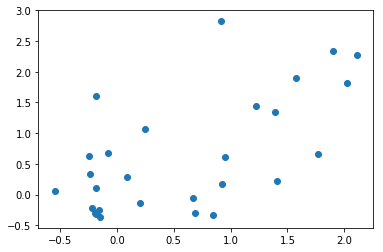

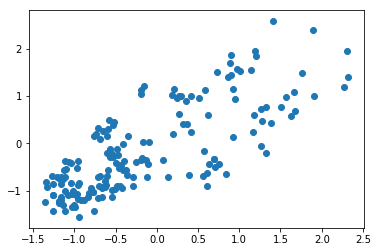

In [249]:
plt.scatter(p_test, y_test["target_t0"])
plt.show()
plt.scatter(p_train, y_train["target_t0"])
plt.show()



In [253]:
test_df = y_test[["target_t0"]]*std+mean
test_df["pred_t0"] = p_test*std+mean
test_df["resid_t0"] = test_df["target_t0"].add(-test_df["pred_t0"])
test_df["abs_resid_t0"] = abs(test_df["resid_t0"])
test_df["ape_t0"] = test_df["resid_t0"].div(test_df["target_t0"])
test_MAPE = test_df["ape_t0"].mean()*100
print("1-period ahead forecasting MAPE: ", test_MAPE)



1-period ahead forecasting MAPE:  -0.22985348519586452


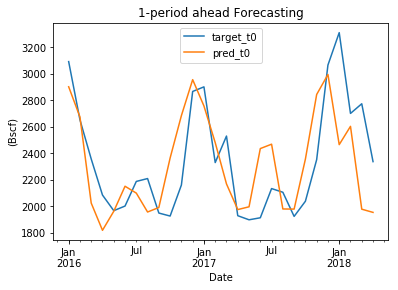

In [252]:
test_df[["target_t0", "pred_t0"]].plot()

plt.title("1-period ahead Forecasting")
plt.ylabel("(Bscf)")
plt.legend()
plt.show()


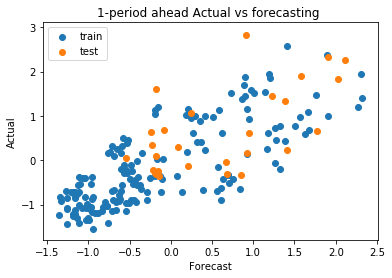

In [254]:
plt.scatter(y=y_train["target_t0"],x=p_train, label="train")
plt.scatter(y=y_test["target_t0"],x=p_test, label="test")
plt.title("1-period ahead Actual vs forecasting ")
plt.ylabel("Actual")
plt.xlabel("Forecast")
plt.legend()
plt.show()


Plotting actual vs forecasted provides a glance on how good model can fit train data and generalize to test data

# Residual Analysis

In order to perform a comprehensive exercise, a residual analysis is carried out, in order to verify:

- Is there some skewness in forecasting (tendendy to over or under forecast)?
     - Verify that residuals are normally distributed
- Does outliers impact on performance? Is there any information remaining on residuals?
    - Residual over time
    - Plot Residual vs Actual

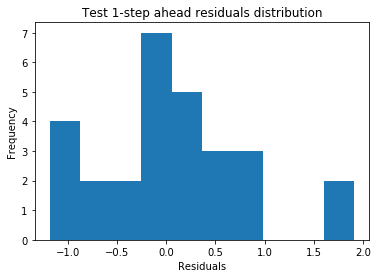

In [255]:
test_resid_1step.plot.hist(bins=10, title="Test 1-step ahead residuals distribution")
plt.xlabel("Residuals")
plt.show()


H0: Data was drawn from a Normal Ditribution
pval 0.24968014657497406 is higher than significance level: 0.05, therefore null hypothesis cannot be rejected


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


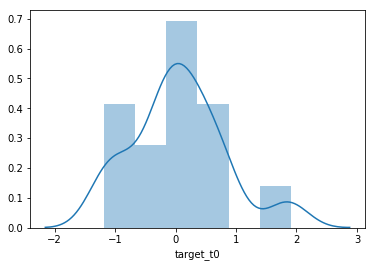

In [256]:
sns.distplot(test_resid_1step)
shapiro_test(test_resid_1step, alpha=0.05)


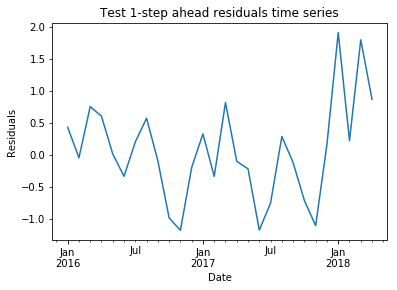

In [259]:
test_resid_1step.plot(title="Test 1-step ahead residuals time series")
plt.ylabel("Residuals")
plt.show()


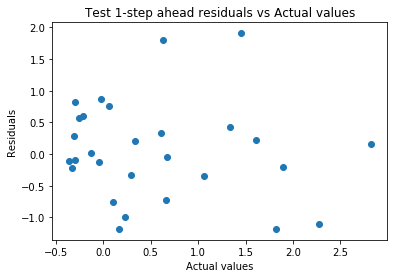

In [260]:
plt.scatter(x=y_test["target_t1"].values, y=test_resid_1step.values)
plt.title("Test 1-step ahead residuals vs Actual values")
plt.ylabel("Residuals")
plt.xlabel("Actual values")
plt.show()

# Forecasting

Muti-period ahead model building

Once we know the best hiperparam set, a new instance of the RF model can be fit on the most recent (and relevant) data. Usually, it is considered that at least 2 years are needed in order to produce a long term daily forecast. Let's re-train a family of RF models using MultiOutput Regressor feature.

In [47]:
multi_rfr = RandomForestRegressor().set_params(**best_rfr_grid).\
    fit(X_train.loc["2016":"2017"], y_train.loc["2016":"2017"])


In [48]:
p_train = multi_rfr.predict(X_train)
train_resid_1step = y_train- p_train

p_test = multi_rfr.predict(X_test)
test_resid_1step = y_test- p_test

Performance Metrics: MAPE (Mean Absolute Percent Error)

Lastly, it is necesary to test forecasting accuracy in several periods, and assess whether it is stable.

In [49]:
periods = [1, 7, 14, 30]

ytest_df = y_test*std+mean
ptest_df = pd.DataFrame(data=p_test*std+mean, index=test_df.index, columns=["pred_t" + str(i) for i in range(1, 31)])
test_df = pd.concat([ytest_df, ptest_df], axis=1)

test_MAPE = []

for t in periods:
    test_df["resid_t" + str(t)] = test_df["target_t" + str(t)].add(-test_df["pred_t" + str(t)])
    test_df["abs_resid_t" + str(t)] = abs(test_df["resid_t" + str(t)])
    test_df["ape_t" + str(t)] = test_df["abs_resid_t" + str(t)].div(test_df["target_t" + str(t)])
    test_MAPE.append(round(test_df["ape_t" + str(t)].mean(), 4)*100)

print("MAPE test: ", test_MAPE)

MAPE test:  [2.62, 3.6700000000000004, 3.7900000000000005, 4.21]


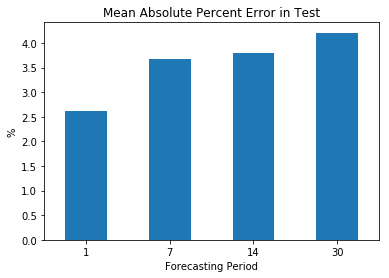

In [50]:
mape_df = pd.DataFrame(index=periods, data={"test_MAPE": test_MAPE})
mape_df.plot(kind="bar", legend=False)
plt.title("Mean Absolute Percent Error in Test")
plt.xlabel("Forecasting Period")
plt.ylabel("%")
plt.xticks(rotation=0)
plt.show()

Not surprisingly, forecasting accuacy on 1 period INCREASES, more data, not always is better. Moreover, MAPE increases with forecasting horizon, but it seems quite stable.

Actual vs Forecasted

As previously stated, a quick way to assess model fit is to plot actual vs forecasted and take a glance at data scattering

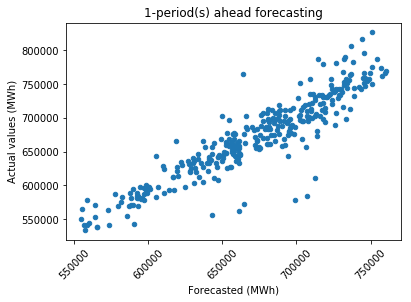

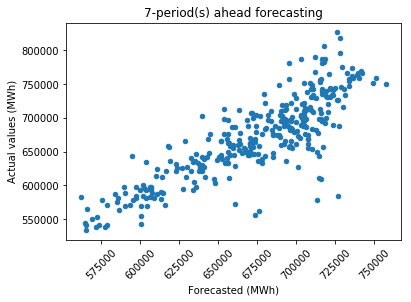

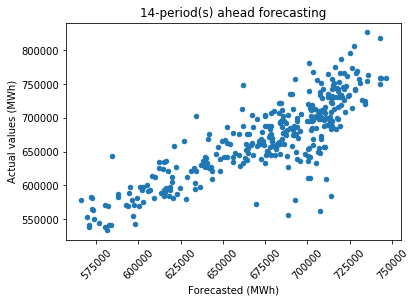

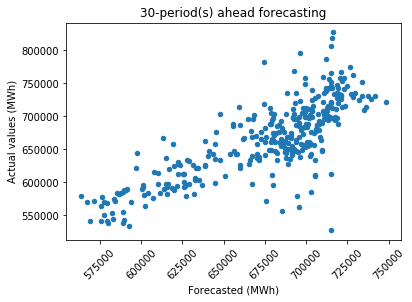

In [51]:
#f, ax = plt.subplots(nrows=3,ncols=2)
for t in periods:
    test_df[["target_t" + str(t), "pred_t" + str(t)]].plot(x="pred_t" + str(t), y="target_t" + str(t) ,kind="scatter")
    plt.title("{}-period(s) ahead forecasting".format(t))
    plt.xlabel("Forecasted (MWh)")
    plt.ylabel("Actual values (MWh)")
    plt.xticks(rotation=45)
    plt.show()

It can be seen that, as forecasting period is longer, scattering is greater, specially for extreme values

# Forecasting 30-days ahead

In [62]:
test_df.index = test_df.index.date

AttributeError: 'Index' object has no attribute 'date'

In [53]:
forecast_range = pd.date_range(start=np.max(test_df.index.values), periods=2*tau, freq="D")
len(forecast_range)

30

In [54]:
forecast = []
for t in range(0, tau):
    #print(-(t+1), (t))
    forecast = p_test[-(t+1):,(t)]*std+mean

In [55]:
t = 1
p_test[-(t+1):,(t)]
# p_test[-(t+1):]

array([-0.90814605,  0.74546428])

In [56]:
p_test

array([[ 0.42897408,  0.48137131,  0.22980026, ...,  0.69070627,
         0.79673419,  0.77152231],
       [ 0.56634992,  0.33260208, -0.27372359, ...,  0.81217427,
         0.78189229,  0.59316232],
       [ 0.34435751, -0.30464262, -0.84472409, ...,  0.84144557,
         0.69288379, -0.09751723],
       ...,
       [ 0.85929704, -0.20133843, -0.85356495, ...,  0.85796499,
         0.6599038 , -0.42460433],
       [-0.23762218, -0.90814605,  0.78540653, ...,  0.72063178,
        -0.42946152, -1.25434822],
       [-0.89106958,  0.74546428,  0.92859314, ..., -0.52682669,
        -1.30516047,  0.08748399]])

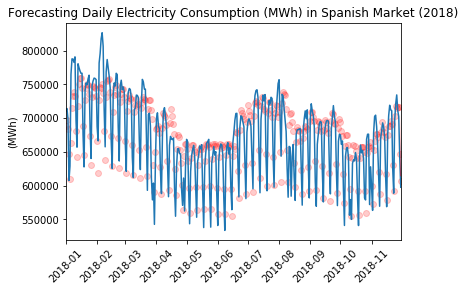

In [57]:
test_df["target_t1"].plot()
plt.scatter(x=test_df.index, y=test_df["pred_t1"], c="r", alpha=0.2, label="test preds")
plt.plot(forecast_range, forecast, c="r", alpha=0.5, label="forecasting")
plt.ylabel("(MWh)")
plt.xticks(rotation=45)
plt.title("Forecasting Daily Electricity Consumption (MWh) in Spanish Market (2018)")
plt.show()

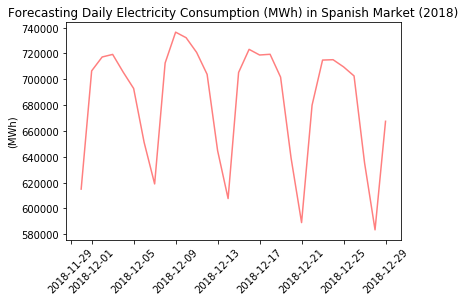

In [59]:
plt.plot(forecast_range, forecast, c="r", alpha=0.5, label="forecasting")
plt.ylabel("(MWh)")
plt.xticks(rotation=45)
plt.title("Forecasting Daily Electricity Consumption (MWh) in Spanish Market (2018)")
plt.show()

In [60]:
np.max(test_df.index.values)

datetime.date(2018, 11, 30)

In [61]:
forecast_range

DatetimeIndex(['2018-11-30', '2018-12-01', '2018-12-02', '2018-12-03',
               '2018-12-04', '2018-12-05', '2018-12-06', '2018-12-07',
               '2018-12-08', '2018-12-09', '2018-12-10', '2018-12-11',
               '2018-12-12', '2018-12-13', '2018-12-14', '2018-12-15',
               '2018-12-16', '2018-12-17', '2018-12-18', '2018-12-19',
               '2018-12-20', '2018-12-21', '2018-12-22', '2018-12-23',
               '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-29'],
              dtype='datetime64[ns]', freq='D')